In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and display the image
image = cv2.imread('E:/IUT/Computer vision/EX3/1.jpg')

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert image to RGB color space
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to HLS color space
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

# Calculate histograms
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
rgb_hist = cv2.calcHist([rgb_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hls_hist = cv2.calcHist([hls_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

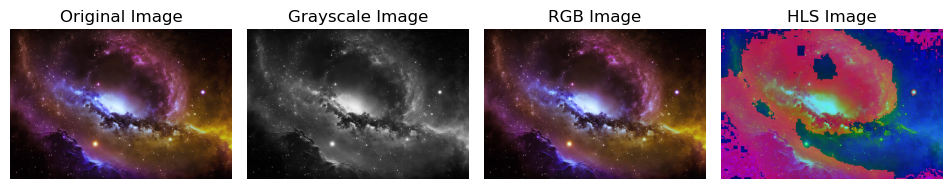

In [26]:
# Plot the original image
plt.figure(figsize=(12, 4))
plt.subplot(151)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot the grayscale image
plt.subplot(152)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Plot the RGB image
plt.subplot(153)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

# Plot the HLS image
plt.subplot(154)
plt.imshow(hls_image)
plt.title('HLS Image')
plt.axis('off')

plt.tight_layout()
plt.show()

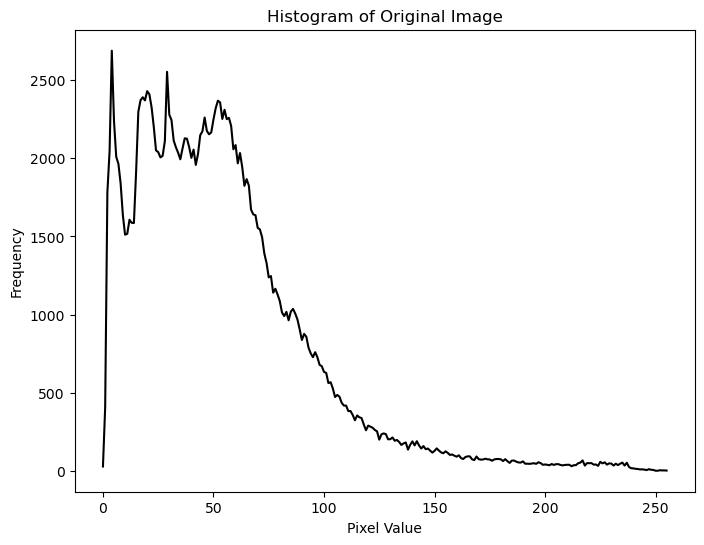

In [23]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate histogram of the original image
original_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the histogram of the original image
plt.figure(figsize=(8, 6))
plt.plot(original_hist, color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

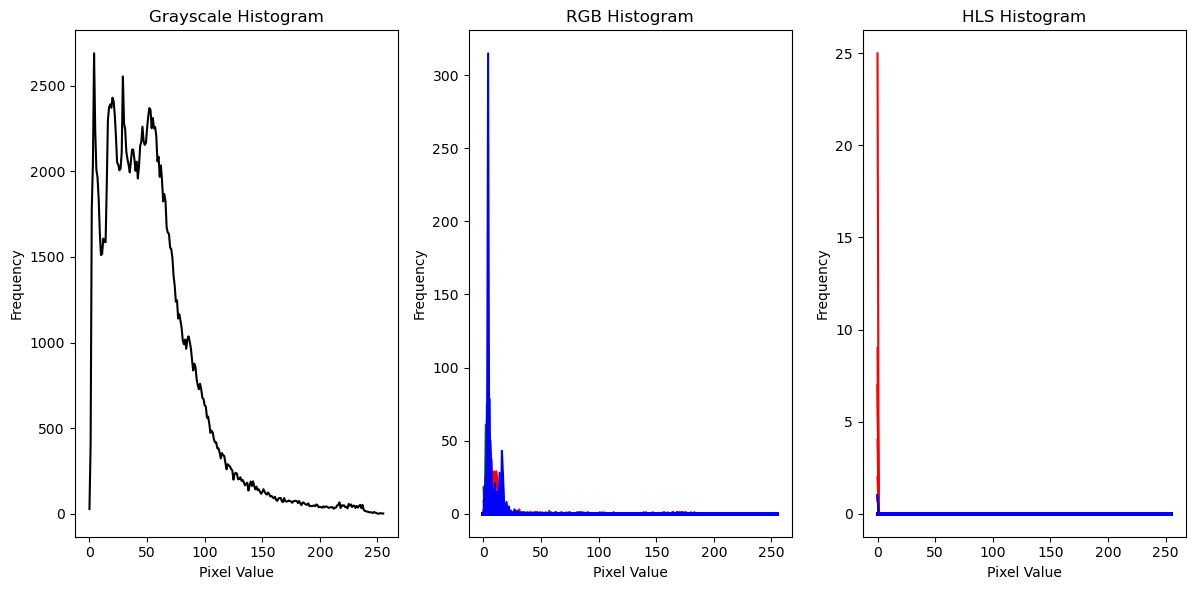

In [24]:
# Plot histograms
plt.figure(figsize=(16, 6))

# Plot grayscale histogram
plt.subplot(141)
plt.plot(gray_hist, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot RGB histogram
plt.subplot(142)
for channel in range(3):
    plt.plot(rgb_hist[:, :, channel], color=('r', 'g', 'b')[channel])
plt.title('RGB Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot HLS histogram
plt.subplot(143)
for channel in range(3):
    plt.plot(hls_hist[:, :, channel], color=('r', 'g', 'b')[channel])
plt.title('HLS Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

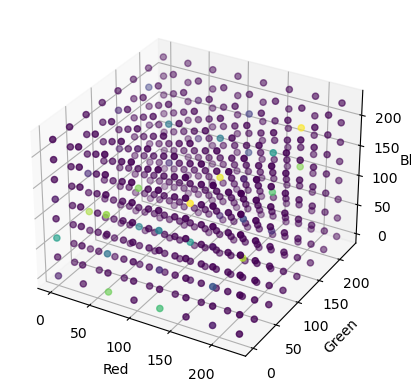

In [13]:
# Convert the image to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Quantize the color values (2-bit quantization)
quantized_image = (image // 64) * 64

# Reshape the quantized image
quantized_image = quantized_image.reshape(-1, 3)

# Calculate the 3D histogram
hist = np.zeros((8, 8, 8), dtype=np.uint8)
for pixel in quantized_image:
    hist[pixel[0] // 32, pixel[1] // 32, pixel[2] // 32] += 1

# Create the 3D plot
x, y, z = np.indices((8, 8, 8)) * 32
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=hist.flatten(), cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

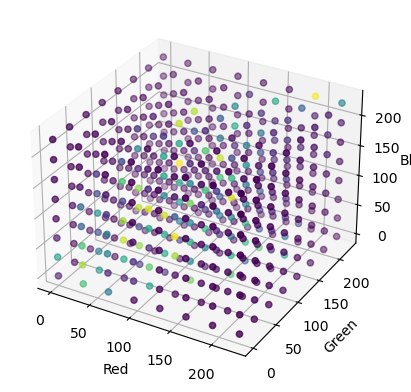

In [14]:
# Convert the image to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Quantize the color values (3-bit quantization)
quantized_image = (image // 32) * 32

# Reshape the quantized image
quantized_image = quantized_image.reshape(-1, 3)

# Calculate the 3D histogram
hist = np.zeros((8, 8, 8), dtype=np.uint8)
for pixel in quantized_image:
    hist[pixel[0] // 32, pixel[1] // 32, pixel[2] // 32] += 1

# Create the 3D plot
x, y, z = np.indices((8, 8, 8)) * 32
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=hist.flatten(), cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

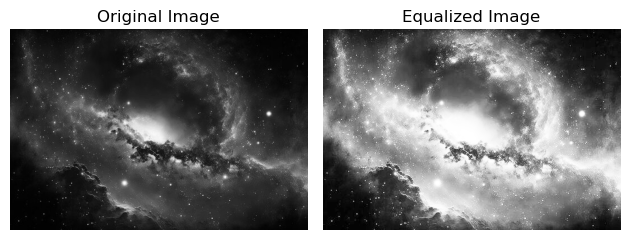

In [15]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the original and equalized images
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

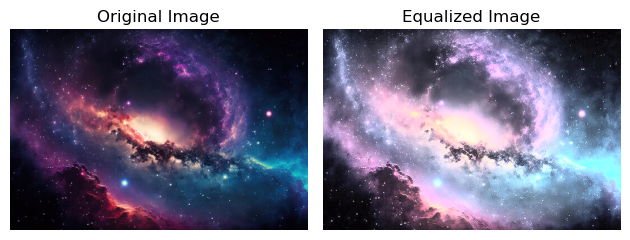

In [16]:
# Convert the image to YUV color space
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Apply histogram equalization to the Y channel
yuv_image[:,:,0] = cv2.equalizeHist(yuv_image[:,:,0])

# Convert the image back to the BGR color space
equalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

# Display the original and equalized images
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


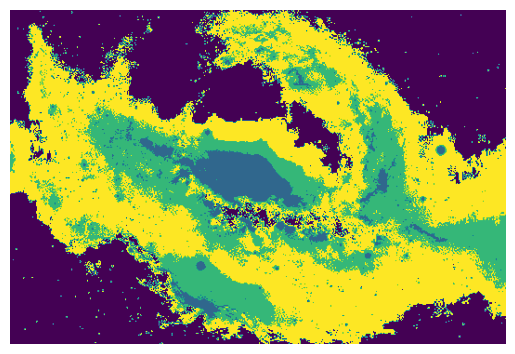

In [17]:
from sklearn.cluster import KMeans

# Convert the image to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D matrix of pixels
pixels = image.reshape(-1, 3)

# Define the number of clusters
num_clusters = 4

# Create a K-means object and fit the pixel data
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

# Get the cluster labels for each pixel
labels = kmeans.labels_

# Reshape the labels back to the original image shape
labels = labels.reshape(image.shape[:2])

# Display the segmented image
plt.imshow(labels, cmap='viridis')
plt.axis('off')
plt.show()